<a href="https://colab.research.google.com/github/madrigaljose/madrigaljose/blob/main/20210710_Madrigal_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from fbprophet import Prophet
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')##############################################

In [ ]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
data = pdr.get_data_yahoo('DE')#, start, end)
data = data[['High']]  
data.tail()

     |████████████████████████████████| 6.3MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=bc0cf01c49d002daa0aeb39a856406ac51b8008e3b8776c8db75b9384d8c22b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-63mzo5kc/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed


,High
Date,
2021-07-02,355.910004
2021-07-06,353.000000
2021-07-07,352.559998
2021-07-08,347.350006
2021-07-09,350.720001


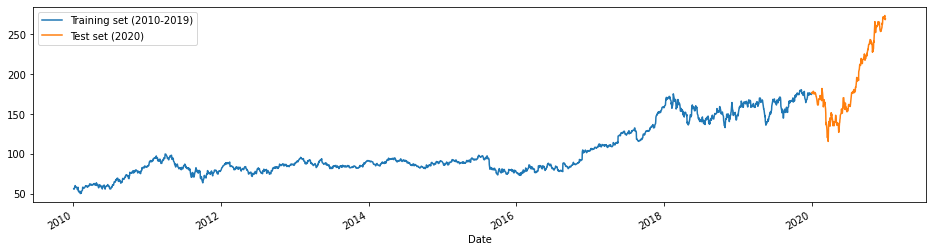

In [ ]:
# create train and test
data["High"]['2010':'2019'].plot(figsize=(16, 4), legend=True)
data["High"]['2020'].plot(figsize=(16, 4), legend=True)

# plot the data
plt.legend(['Training set (2010-2019)', 'Test set (2020)'])
#plt.title('Deere Stock')
#fig_path = os.path.join(pth, stock_name + '_train_test')

# save the data, pause, and close
#plt.savefig(fig_path)
#plt.pause(1)
#plt.close()

In [ ]:
# create training and test set
#training_set = data[:'2016'].iloc[:, 1:2].values
#test_set = data['2017':].iloc[:, 1:2].values
training_set=data[["High"]]['2010':'2019']
test_set=data[["High"]]['2020']


In [ ]:
training_set

,High
Date,
2010-01-04,56.200001
2010-01-05,56.560001
2010-01-06,56.040001
2010-01-07,56.130001
2010-01-08,57.750000
...,...
2019-12-24,175.500000
2019-12-26,175.130005
2019-12-27,175.860001


In [ ]:
test_set

,High
Date,
2020-01-02,176.880005
2020-01-03,175.759995
2020-01-06,176.880005
2020-01-07,176.440002
2020-01-08,176.779999
...,...
2020-12-24,269.579987
2020-12-28,273.559998
2020-12-29,269.540009


In [ ]:
# scale the data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# create training and test data
X_train = []
y_train = []
for i in range(60, 2516):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

total_data = pd.concat((data["High"]['2010':'2019'], data["High"]['2020':]), axis=0)
inputs = total_data[len(total_data) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)


In [ ]:
# Preparing X_test
X_test = []
for i in range(60, 253):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#def create_single_layer_small_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelA = Sequential()
RNNmodelA.add(SimpleRNN(6))
RNNmodelA.add(Dense(1))

RNNmodelA.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelA.fit(X_train, y_train, epochs=100, batch_size=150,verbose=0)

# Finalizing predictions
scaled_preds = RNNmodelA.predict(X_test)
RNNAtest_preds = sc.inverse_transform(scaled_preds)

In [ ]:
RNNmodelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 6)                 48        
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNNAtest_preds

array([[163.0035 ],
       [162.73102],
       [160.61853],
       [157.24358],
       [159.4961 ],
       [158.49188],
       [162.94467],
       [167.67786],
       [171.39723],
       [172.29768],
       [173.73866],
       [170.25214],
       [169.65616],
       [166.90634],
       [165.48016],
       [166.2684 ],
       [169.21365],
       [168.75279],
       [170.43921],
       [172.8997 ],
       [170.6378 ],
       [173.18814],
       [172.17729],
       [171.71562],
       [176.48535],
       [178.35857],
       [177.89961],
       [180.68698],
       [180.83563],
       [179.09459],
       [179.45328],
       [178.84906],
       [175.83257],
       [182.03104],
       [181.55707],
       [184.72983],
       [189.0265 ],
       [189.81656],
       [189.61356],
       [189.34462],
       [190.16245],
       [189.7302 ],
       [190.8542 ],
       [189.62218],
       [189.30656],
       [190.17014],
       [189.34227],
       [190.02467],
       [190.56659],
       [191.81433],


In [ ]:
#def create_single_layer_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelB = Sequential()
RNNmodelB.add(SimpleRNN(32))
RNNmodelB.add(Dense(1))

RNNmodelB.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelB.fit(X_train, y_train, epochs=100, batch_size=150,verbose=1)

# Finalizing predictions
scaled_preds = RNNmodelB.predict(X_test)
RNNBtest_preds = sc.inverse_transform(scaled_preds)

Epoch 1/100
17/17 [==============================] - 2s 11ms/step - loss: 0.0525
Epoch 2/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 3/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 6/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 8/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 9/100
17/17 [==============================] - 0s 12ms/step - loss: 8.8986e-04
Epoch 10/100
17/17 [==============================] - 0s 11ms/step - loss: 7.5501e-04
Epoch 11/100
17/17 [==============================] - 0s 11ms/step - loss: 8.1717e-04
Epoch 12/100
17/17 [==============================] - 0s 11ms/step - loss: 5.4605e-04
Epoch 13/

In [ ]:
#def create_single_layer_small_rnn_model(X_train, y_train, X_test, sc):
#    '''
#    create single layer rnn model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''   
# create a model
RNNmodelC = Sequential()
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32, return_sequences=True))
RNNmodelC.add(SimpleRNN(32))
RNNmodelC.add(Dense(1))

RNNmodelC.compile(optimizer='rmsprop', loss='mean_squared_error')

# fit the RNN model
RNNmodelC.fit(X_train, y_train, epochs=100, batch_size=150,verbose=1)

# Finalizing predictions
scaled_preds = RNNmodelC.predict(X_test)
RNNCtest_preds = sc.inverse_transform(scaled_preds)

Epoch 1/100
17/17 [==============================] - 7s 53ms/step - loss: 0.2131
Epoch 2/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0165
Epoch 3/100
17/17 [==============================] - 1s 55ms/step - loss: 0.0160
Epoch 4/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0209
Epoch 5/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0189
Epoch 6/100
17/17 [==============================] - 1s 55ms/step - loss: 0.0120
Epoch 7/100
17/17 [==============================] - 1s 51ms/step - loss: 0.0114
Epoch 8/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0138
Epoch 9/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0095
Epoch 10/100
17/17 [==============================] - 1s 52ms/step - loss: 0.0133
Epoch 11/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0100
Epoch 12/100
17/17 [==============================] - 1s 51ms/step - loss: 0.0077
Epoch 13/100
17/17 [=====

In [ ]:
RNNCtest_preds

array([[163.33624],
       [163.47942],
       [163.20317],
       [168.36002],
       [170.34375],
       [172.30565],
       [172.82388],
       [174.22868],
       [173.80345],
       [174.12724],
       [173.80754],
       [175.1197 ],
       [174.56018],
       [173.8169 ],
       [173.91661],
       [175.86298],
       [174.73   ],
       [173.45935],
       [174.66333],
       [174.9643 ],
       [177.25342],
       [176.39137],
       [177.13997],
       [180.43341],
       [181.80748],
       [180.33542],
       [179.93188],
       [181.28868],
       [181.4092 ],
       [181.16803],
       [180.97719],
       [180.22836],
       [184.38287],
       [184.03046],
       [185.09007],
       [185.45569],
       [185.80461],
       [185.28658],
       [185.48817],
       [187.09782],
       [186.77127],
       [186.4948 ],
       [185.40347],
       [185.85855],
       [186.7187 ],
       [186.40315],
       [186.43251],
       [186.52066],
       [187.04556],
       [186.34737],


In [ ]:
#def create_GRU_model(X_train, y_train, X_test, sc):
#    '''
#    create GRU model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01,decay=1e-7,momentum=0.9,nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
17/17 [==============================] - 10s 190ms/step - loss: 0.1471
Epoch 2/50
17/17 [==============================] - 3s 192ms/step - loss: 0.0416
Epoch 3/50
17/17 [==============================] - 3s 193ms/step - loss: 0.0140
Epoch 4/50
17/17 [==============================] - 3s 193ms/step - loss: 0.0013
Epoch 5/50
17/17 [==============================] - 3s 201ms/step - loss: 8.6063e-04
Epoch 6/50
17/17 [==============================] - 3s 197ms/step - loss: 6.1715e-04
Epoch 7/50
17/17 [==============================] - 3s 197ms/step - loss: 6.2692e-04
Epoch 8/50
17/17 [==============================] - 3s 194ms/step - loss: 5.7607e-04
Epoch 9/50
17/17 [==============================] - 3s 195ms/step - loss: 6.2337e-04
Epoch 10/50
17/17 [==============================] - 3s 194ms/step - loss: 6.6412e-04
Epoch 11/50
17/17 [==============================] - 3s 199ms/step - loss: 6.0477e-04
Epoch 12/50
17/17 [==============================] - 3s 200ms/step - loss: 6.2

In [ ]:
#def create_GRU_with_drop_out_model(X_train, y_train, X_test, sc):
#    '''
#    create GRU model trained on X_train and y_train
#    and make predictions on the X_test data
#    '''
# The GRU architecture
regressorGRUB = Sequential()
# First GRU layer with Dropout regularisation
regressorGRUB.add(GRU(units=50, return_sequences=True,input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Second GRU layer
regressorGRUB.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Third GRU layer
regressorGRUB.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# Fourth GRU layer
regressorGRUB.add(GRU(units=50, activation='tanh'))
regressorGRUB.add(Dropout(0.2))
# The output layer
regressorGRUB.add(Dense(units=1))
# Compiling the RNN
regressorGRUB.compile(optimizer=SGD(lr=0.01,decay=1e-7,momentum=0.9,nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRUB.fit(X_train, y_train, epochs=50, batch_size=150)
GRUB_predicted_stock_price = regressorGRUB.predict(X_test)
GRUB_predicted_stock_price = sc.inverse_transform(GRUB_predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/50
17/17 [==============================] - 10s 206ms/step - loss: 0.1031
Epoch 2/50
17/17 [==============================] - 4s 211ms/step - loss: 0.0298
Epoch 3/50
17/17 [==============================] - 4s 211ms/step - loss: 0.0075
Epoch 4/50
17/17 [==============================] - 4s 212ms/step - loss: 0.0039
Epoch 5/50
17/17 [==============================] - 4s 215ms/step - loss: 0.0035
Epoch 6/50
17/17 [==============================] - 4s 207ms/step - loss: 0.0033
Epoch 7/50
17/17 [==============================] - 4s 205ms/step - loss: 0.0027
Epoch 8/50
17/17 [==============================] - 3s 204ms/step - loss: 0.0029
Epoch 9/50
17/17 [==============================] - 4s 206ms/step - loss: 0.0025
Epoch 10/50
17/17 [==============================] - 4s 207ms/step - loss: 0.0026
Epoch 11/50
17/17 [==============================] - 4s 207ms/step - loss: 0.0028
Epoch 12/50
17/17 [==============================] - 4s 205ms/step - loss: 0.0026
Epoch 13/50
17/17 [=====

In [ ]:
total_data

Date
2010-01-04     56.200001
2010-01-05     56.560001
2010-01-06     56.040001
2010-01-07     56.130001
2010-01-08     57.750000
                 ...    
2021-07-02    355.910004
2021-07-06    353.000000
2021-07-07    352.559998
2021-07-08    347.350006
2021-07-09    350.720001
Name: High, Length: 2899, dtype: float64

In [ ]:
#def create_prophet_results(all_data,
#                           final_train_idx=2516,
#                           pred_periods=253):
#    '''
#    create prophet model trained on first 2768 rows by
#    default and predicts on last 250 rows
#    '''
# Pull train data
final_train_idx=2516
pred_periods=253
train_data = total_data[:final_train_idx].reset_index()[['Date', 'High']]
train_data.columns = ['ds', 'y']

# Create and fit model
prophet_model = Prophet()
prophet_model.fit(train_data)#

# Provide predictions
test_dates = prophet_model.make_future_dataframe(periods=pred_periods)
prophet_forecast_prices = prophet_model.predict(test_dates)
#
#    return forecast_prices


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_forecast_prices

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,49.255588,44.534312,58.158199,49.255588,49.255588,1.985476,1.985476,1.985476,-1.351118,-1.351118,-1.351118,3.336595,3.336595,3.336595,0.0,0.0,0.0,51.241064
1,2010-01-05,49.354413,45.142422,58.715042,49.354413,49.354413,2.332106,2.332106,2.332106,-1.216340,-1.216340,-1.216340,3.548446,3.548446,3.548446,0.0,0.0,0.0,51.686519
2,2010-01-06,49.453238,45.138123,58.585076,49.453238,49.453238,2.440691,2.440691,2.440691,-1.321753,-1.321753,-1.321753,3.762444,3.762444,3.762444,0.0,0.0,0.0,51.893929
3,2010-01-07,49.552063,45.759277,59.069485,49.552063,49.552063,2.620135,2.620135,2.620135,-1.356022,-1.356022,-1.356022,3.976156,3.976156,3.976156,0.0,0.0,0.0,52.172198
4,2010-01-08,49.650889,46.365321,59.356185,49.650889,49.650889,2.875906,2.875906,2.875906,-1.311283,-1.311283,-1.311283,4.187189,4.187189,4.187189,0.0,0.0,0.0,52.526794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2020-09-05,176.788033,164.846316,183.876858,169.905996,183.305181,-2.299962,-2.299962,-2.299962,3.278258,3.278258,3.278258,-5.578220,-5.578220,-5.578220,0.0,0.0,0.0,174.488071
2765,2020-09-06,176.817354,165.252635,183.998858,169.865221,183.369158,-2.189310,-2.189310,-2.189310,3.278258,3.278258,3.278258,-5.467568,-5.467568,-5.467568,0.0,0.0,0.0,174.628044
2766,2020-09-07,176.846674,160.870904,179.561785,169.839646,183.462271,-6.703404,-6.703404,-6.703404,-1.351118,-1.351118,-1.351118,-5.352286,-5.352286,-5.352286,0.0,0.0,0.0,170.143270
2767,2020-09-08,176.875995,161.008253,179.950526,169.833736,183.496965,-6.450461,-6.450461,-6.450461,-1.216340,-1.216340,-1.216340,-5.234122,-5.234122,-5.234122,0.0,0.0,0.0,170.425534


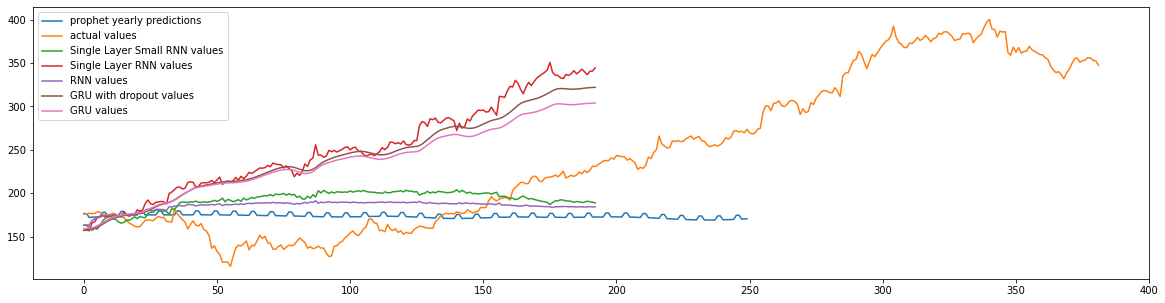

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(prophet_forecast_prices.reset_index()['yhat'].values[-250:], label='prophet yearly predictions')
plt.plot(data["High"]['2020':].values[:-1], label='actual values')
plt.plot(RNNAtest_preds, label='Single Layer Small RNN values')
plt.plot(RNNBtest_preds, label='Single Layer RNN values')
plt.plot(RNNCtest_preds, label='RNN values')
plt.plot(GRUB_predicted_stock_price, label='GRU with dropout values')
plt.plot(GRU_predicted_stock_price, label='GRU values')
#plt.title('{} Predictions from Prophet vs. Actual'.format(stock_name))
plt.legend()